#**Importing** **Libraries**



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Data** **Loading**

In [2]:
path = "/content/Entertainer_data_analysis.xlsx"
df = pd.read_excel(path)

#**Data** **Cleaning**

In [3]:
df.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death,Age at Breakthrough,Active Years
0,Adele,F,1988,2008,19,2009,2016,Alive,20,8
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999,2016,Alive,24,17
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968,2014,Alive,25,47
3,Bette Davis,F,1908,1934,Of Human Bondage,1935,1989,1989,26,55
4,Betty White,F,1922,1952,Life with Elilzabeth,1976,2016,Alive,30,64


Now, we observe each features of the dataset:
1. `Entertainer:` The Entertainer feature is name of Entertainers  
2. `Gender:` Gender feature specifies the gender of the Entertainer
3. `Birth Year:` It describes the birth year of the Entertainer.
4. `Year of Breakthrough/#1 Hit/Award Nomination:` It describes the year of break through of entertainer
5. `Breakthrough Name:` It describes the name of the film with which they get their breakthrough
6. `Year of First Grammy/Oscar/Emmy:` It describes the year of first award.
7. `Year of Last Major work:` It describes the last year of their career.
8. `Year of Death:` This feature explains the death year of entertainers.
9. `Age at Breakthrough:` The age of entertainers at which they got their first breakthrough
10. `Active Years:` It describes for how many years they served the film industry.















In [4]:
df.shape

(70, 10)

In [5]:
df.info()     #handled missing values using excel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entertainer                                   70 non-null     object
 1   Gender (traditional)                          70 non-null     object
 2   Birth Year                                    70 non-null     int64 
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64 
 4   Breakthrough Name                             70 non-null     object
 5   Year of First Oscar/Grammy/Emmy               70 non-null     int64 
 6   Year of Last Major Work (arguable)            70 non-null     int64 
 7   Year of Death                                 70 non-null     object
 8   Age at Breakthrough                           70 non-null     int64 
 9   Active Years                                  70 non-null     int64 
dtypes: i

In [6]:
df.describe()

,Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Age at Breakthrough,Active Years
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1935.585714,1964.228571,1976.214286,1998.971429,28.642857,34.742857
std,24.135783,22.411935,21.184417,22.874561,8.124102,16.059388
min,1889.000000,1915.000000,1929.000000,1933.000000,13.000000,2.000000
25%,1916.000000,1949.500000,1962.250000,1980.000000,23.250000,22.500000
50%,1935.500000,1963.500000,1976.000000,2014.000000,26.000000,36.500000
75%,1954.000000,1983.500000,1992.000000,2016.000000,33.000000,47.000000
max,1988.000000,2008.000000,2017.000000,2016.000000,63.000000,65.000000


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(70, 10)

Observation: there is no duplicates in the dataset

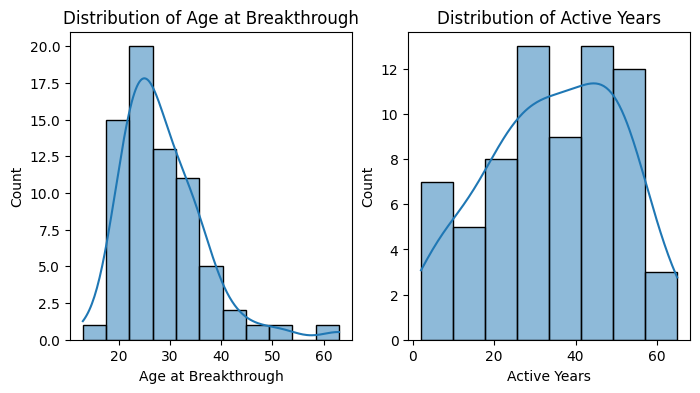

In [23]:
# Distribution of 'Age at Breakthrough' and 'Active Years'
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age at Breakthrough'], kde=True)
plt.title('Distribution of Age at Breakthrough')

plt.subplot(1, 2, 2)
sns.histplot(df['Active Years'], kde=True)
plt.title('Distribution of Active Years')
plt.show()

`Observation:` There is a right skewness in the distribution of age at breakthrough which indicates the outliers whether in the distribution of Active Years there is no skewness but a wide range in active years.

In [26]:
print(df['Age at Breakthrough'].mean())

print(df['Age at Breakthrough'].mode())

print(df['Age at Breakthrough'].median())


28.642857142857142
0    25
Name: Age at Breakthrough, dtype: int64
26.0


In [32]:
print(df['Active Years'].mean())

print(df['Active Years'].mode())

print(df['Active Years'].median())

34.74285714285714
0    47
Name: Active Years, dtype: int64
36.5


#Identifying Outliers

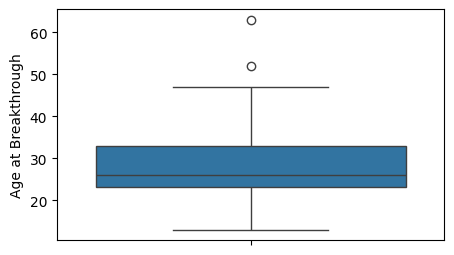

In [18]:
plt.figure(figsize= (5,3))
sns.boxplot(df['Age at Breakthrough'])
plt.show()

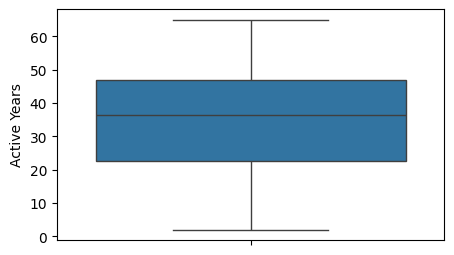

In [21]:
plt.figure(figsize= (5,3))
sns.boxplot(df['Active Years'])
plt.show()

`Observation`: From above two graphs, we observed that in "Age at breakthrough" column we have an outlier far away from 60 i.e. 63.
It shows that we have an especial case, where an entertainer got his first breakthrough at the age of 63.

# **Relationship and Correlation**

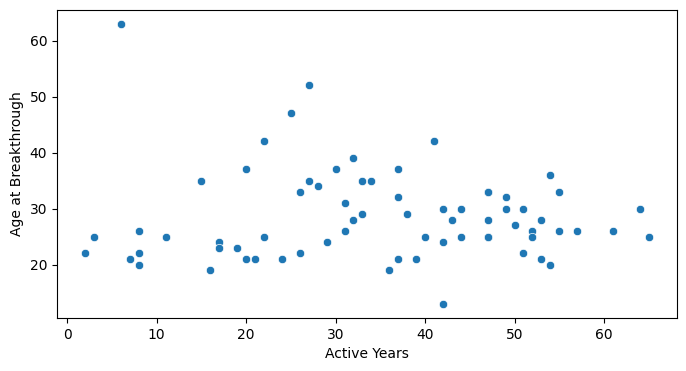

In [36]:
#Identifying the relationship between 'Age at Breakthrough' and 'Active Years'
plt.figure(figsize=(8,4))
sns.scatterplot(data = df, x = 'Active Years', y = 'Age at Breakthrough')
plt.show()

`Observation:` The above graph shows that there is no relation between "age at breakthrough" and "Active Years".

In [37]:
# Correlation Coefficient
correlation = df['Age at Breakthrough'].corr(df['Active Years'])
print(f"Correlation between Age at Breakthrough and Active Years: {correlation}")


Correlation between Age at Breakthrough and Active Years: -0.0659196669684237


`Observation:` A correlation coefficient of -0.0659 between "Age at Breakthrough" and "Active Years" suggests a very weak negative relationship between these two variables

# **Data Analysis**

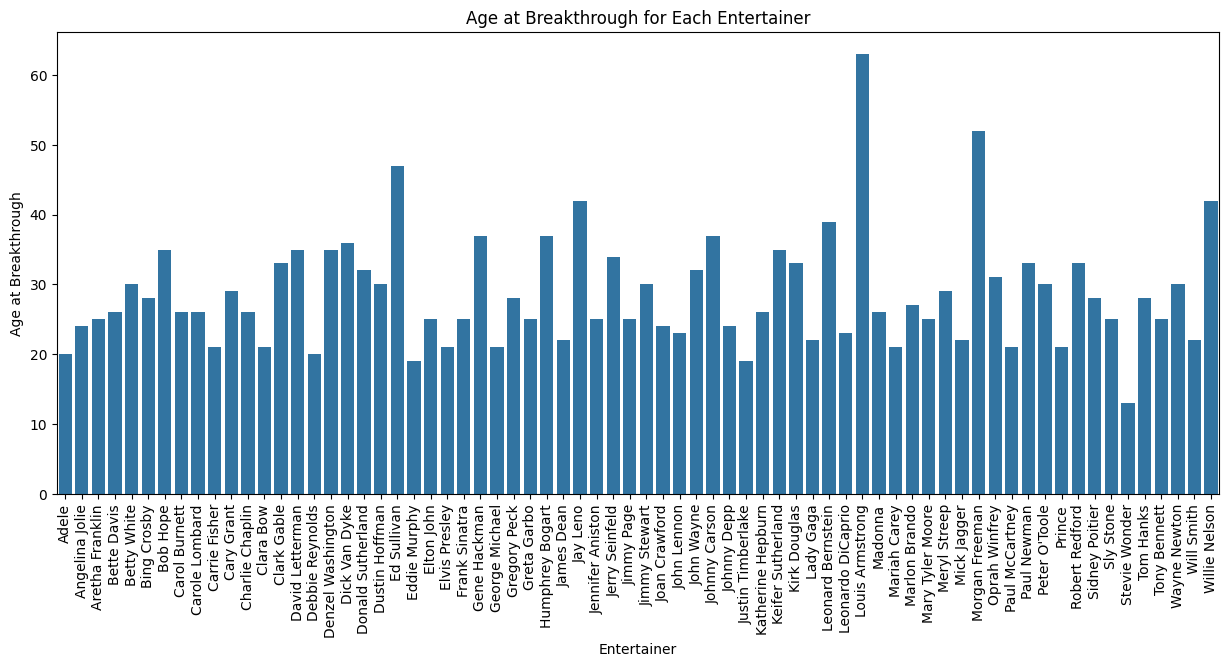

In [40]:
# Bar Plot of Age at Breakthrough for Each Entertainer
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Entertainer'], y=df['Age at Breakthrough'])
plt.title('Age at Breakthrough for Each Entertainer')
plt.xlabel('Entertainer')
plt.ylabel('Age at Breakthrough')
plt.xticks(rotation=90)
plt.show()

`Observation:` As per the above graph, "Morgan Freeman" got his first first breakthrough at the age of 52 and "Louis Armstrong" received his first breakthough at the age of 63 whereas some of the entertainers had received their breakthrough at a very early age of 13.

In [45]:
# Calculating the range, mean, and median for Age at Breakthrough across entertainers.

# Calculate the range
age_range = df['Age at Breakthrough'].max() - df['Age at Breakthrough'].min()

# Calculate the mean
age_mean = df['Age at Breakthrough'].mean()

# Calculate the median
age_median = df['Age at Breakthrough'].median()

# Print the results
print("Range of Age at Breakthrough:", age_range)
print("Mean Age at Breakthrough:", age_mean)
print("Median Age at Breakthrough:", age_median)


Range of Age at Breakthrough: 50
Mean Age at Breakthrough: 28.642857142857142
Median Age at Breakthrough: 26.0


`Observation:` A range of 50 indicates that there is a span of 50 years between the youngest and oldest age at which entertainers achieved their breakthroughs according to the data. It provides insight into the spread or variability of ages among entertainers when they achieved significant milestones or successes in their careers.

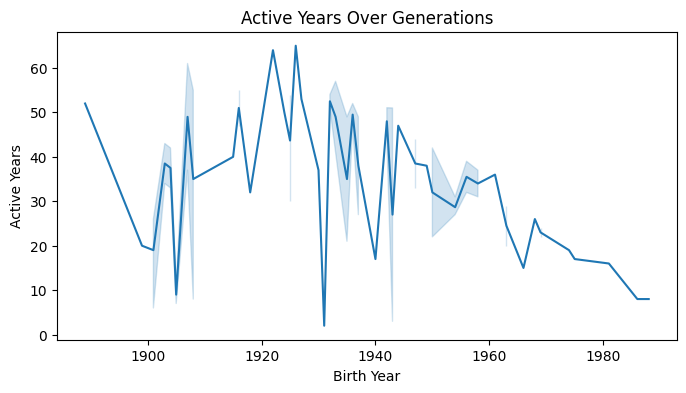

In [50]:
# Creating line plot showing the Active Years against Birth Year.
plt.figure(figsize=(8, 4))
sns.lineplot(x=df['Birth Year'], y=df['Active Years'])
plt.title('Active Years Over Generations')
plt.xlabel('Birth Year')
plt.ylabel('Active Years')
plt.show()

`Observation:` This suggests that entertainers born since the early 1900s tended to have longer careers than those born before the 1900s.

In [51]:
# Identifying the entertainer with the maximum value in the Active Years column.
# Find the maximum active years
max_active_years = df['Active Years'].max()

# Filter the DataFrame to get the row(s) where 'Active Years' equals the maximum value
long_career_entertainer = df[df['Active Years'] == max_active_years]

# Extract the name(s) of the entertainer(s) with the longest career
entertainer_long_career = long_career_entertainer['Entertainer'].values.tolist()

print(f"Entertainer with the longest career ({max_active_years} years): {entertainer_long_career}")


Entertainer with the longest career (65 years): ['Tony Bennett']


In [52]:
# Identify the entertainer with the earliest value in the Year of Breakthrough.
min_year = df['Year of Breakthrough/#1 Hit/Award Nomination'].min()
earliest_breakthrough = df[df['Year of Breakthrough/#1 Hit/Award Nomination'] == min_year]

entertainer_early_breakthrough = earliest_breakthrough['Entertainer'].values.tolist()

print(f"Entertainer with earliest breakthrough at {min_year}: {entertainer_early_breakthrough}")


Entertainer with earliest breakthrough at 1915: ['Charlie Chaplin']


In [59]:
#Identifying youngest entertainer to get the award
youngest_age = df['Age at Breakthrough'].min()
youngest_entertainer = df.loc[df['Age at Breakthrough'] == youngest_age, 'Entertainer'].iloc[0]

print(f"The youngest entertainer to get the award is {youngest_entertainer} at the age of {youngest_age}")


The youngest entertainer to get the award is Stevie Wonder at the age of 13


In [79]:
# Distribution of Gender
Gender_dist = df.groupby("Gender (traditional)").count()['Entertainer'].reset_index()

Gender_dist

,Gender (traditional),Entertainer
0,F,20
1,M,50


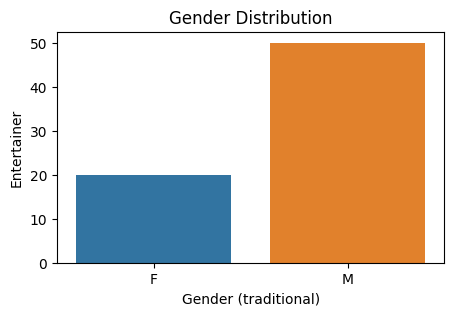

In [77]:
plt.figure(figsize=(5,3))
sns.barplot(data= Gender_dist, y= 'Entertainer', x = 'Gender (traditional)', hue = 'Gender (traditional)' )
plt.title('Gender Distribution')
plt.show()

`Observation:` This shows that the count of female entertainers are 2/5th of male entertainers

In [87]:
gender_awards_distribution = df.groupby("Gender (traditional)")['Year of First Oscar/Grammy/Emmy'].count().reset_index()

gender_awards_distribution

,Gender (traditional),Year of First Oscar/Grammy/Emmy
0,F,20
1,M,50


In [114]:
#Number of awards each year against gender
count_awards = df.groupby(['Year of First Oscar/Grammy/Emmy', 'Gender (traditional)'])['Entertainer'].count().reset_index()

count_awards.head()

,Year of First Oscar/Grammy/Emmy,Gender (traditional),Entertainer
0,1929,M,1
1,1933,F,1
2,1934,M,1
3,1935,F,1
4,1940,M,1


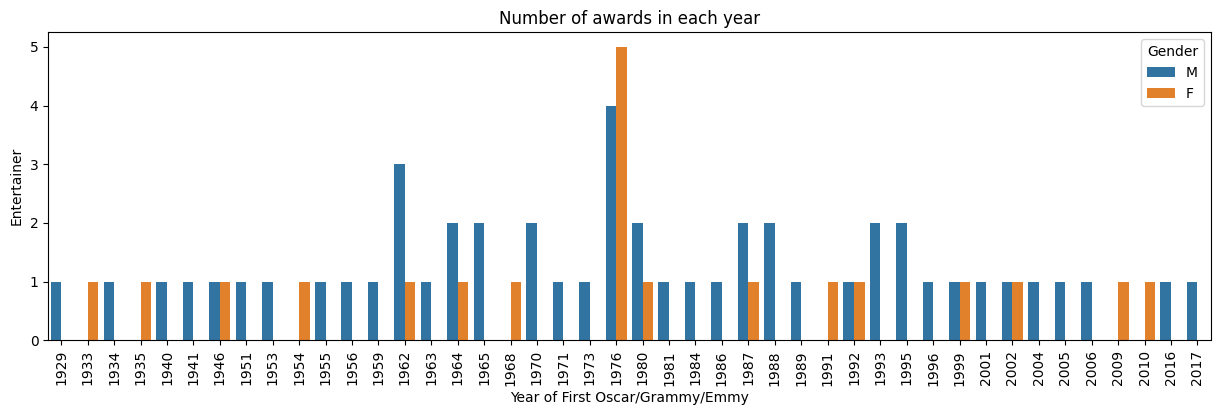

In [113]:
plt.figure(figsize=(15,4))
sns.barplot(data = count_awards, x= 'Year of First Oscar/Grammy/Emmy', y = 'Entertainer', hue= 'Gender (traditional)')
plt.xticks(rotation = 90)
plt.title('Number of awards in each year')
plt.legend(title='Gender')
plt.show()

`Observation:` The above analysis shows that, Year 1976 had the highest
number of Entertainers to won any Oscar, Grammy or Emmy. and the maximum number of award had received by female entertaineras compared to male entertainer which was record breaking in a decade.
In 1962, the number of award received by male entertainer is higher as compared to female.



In [126]:
# count of Entertainer still alive
alive_count = df[df["Year of Death"] == 'Alive'].shape[0]

print(f"The number of entertainers still alive: {alive_count}")

The number of entertainers still alive: 40


In [151]:
#most active male entertainer
male_entertainers = df[df['Gender (traditional)'] == 'M']

# Find the maximum active years among male entertainers
max_active_years = male_entertainers['Active Years'].max()

# Identify the male entertainer(s) with the maximum active years
most_active_male_entertainer = male_entertainers.loc[male_entertainers['Active Years'] == max_active_years].iloc[0]

most_active_male_entertainer

Entertainer                                       Tony Bennett
Gender (traditional)                                         M
Birth Year                                                1926
Year of Breakthrough/#1 Hit/Award Nomination              1951
Breakthrough Name                               Because of You
Year of First Oscar/Grammy/Emmy                           1963
Year of Last Major Work (arguable)                        2016
Year of Death                                            Alive
Age at Breakthrough                                         25
Active Years                                                65
Name: 66, dtype: object

In [154]:
#most active female entertainer
female_entertainers = df[df['Gender (traditional)'] == 'F']

# Find the maximum active years among male entertainers
max_active_years = female_entertainers['Active Years'].max()

# Identify the male entertainer(s) with the maximum active years
most_active_female_entertainer = female_entertainers.loc[female_entertainers['Active Years'] == max_active_years].iloc[0]

most_active_female_entertainer

Entertainer                                              Betty White
Gender (traditional)                                               F
Birth Year                                                      1922
Year of Breakthrough/#1 Hit/Award Nomination                    1952
Breakthrough Name                               Life with Elilzabeth
Year of First Oscar/Grammy/Emmy                                 1976
Year of Last Major Work (arguable)                              2016
Year of Death                                                  Alive
Age at Breakthrough                                               30
Active Years                                                      64
Name: 4, dtype: object

In [155]:
#least active male entertainer
male_entertainers = df[df['Gender (traditional)'] == 'M']

# Find the maximum active years among male entertainers
least_active_years = male_entertainers['Active Years'].min()

# Identify the male entertainer(s) with the maximum active years
least_active_male_entertainer = male_entertainers.loc[male_entertainers['Active Years'] == least_active_years].iloc[0]

least_active_male_entertainer

Entertainer                                       James Dean
Gender (traditional)                                       M
Birth Year                                              1931
Year of Breakthrough/#1 Hit/Award Nomination            1953
Breakthrough Name                               East of Eden
Year of First Oscar/Grammy/Emmy                         1955
Year of Last Major Work (arguable)                      1955
Year of Death                                           1955
Age at Breakthrough                                       22
Active Years                                               2
Name: 30, dtype: object

In [162]:
#Least active female entertainer
female_entertainers = df[df['Gender (traditional)'] == 'F']

# Find the maximum active years among male entertainers
min_active_years = female_entertainers['Active Years'].min()

# Identify the male entertainer(s) with the maximum active years
min_active_female_entertainer = female_entertainers.loc[female_entertainers['Active Years'] == min_active_years].iloc[0]

min_active_female_entertainer

Entertainer                                     Clara Bow
Gender (traditional)                                    F
Birth Year                                           1905
Year of Breakthrough/#1 Hit/Award Nomination         1926
Breakthrough Name                                 Mantrap
Year of First Oscar/Grammy/Emmy                      1976
Year of Last Major Work (arguable)                   1933
Year of Death                                        1965
Age at Breakthrough                                    21
Active Years                                            7
Name: 12, dtype: object